[*********************100%***********************]  1 of 1 completed
C:\Users\Jaypa\AppData\Local\Temp\ipykernel_27564\1205862410.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][short_window:] = np.where(data['Short_MA'][

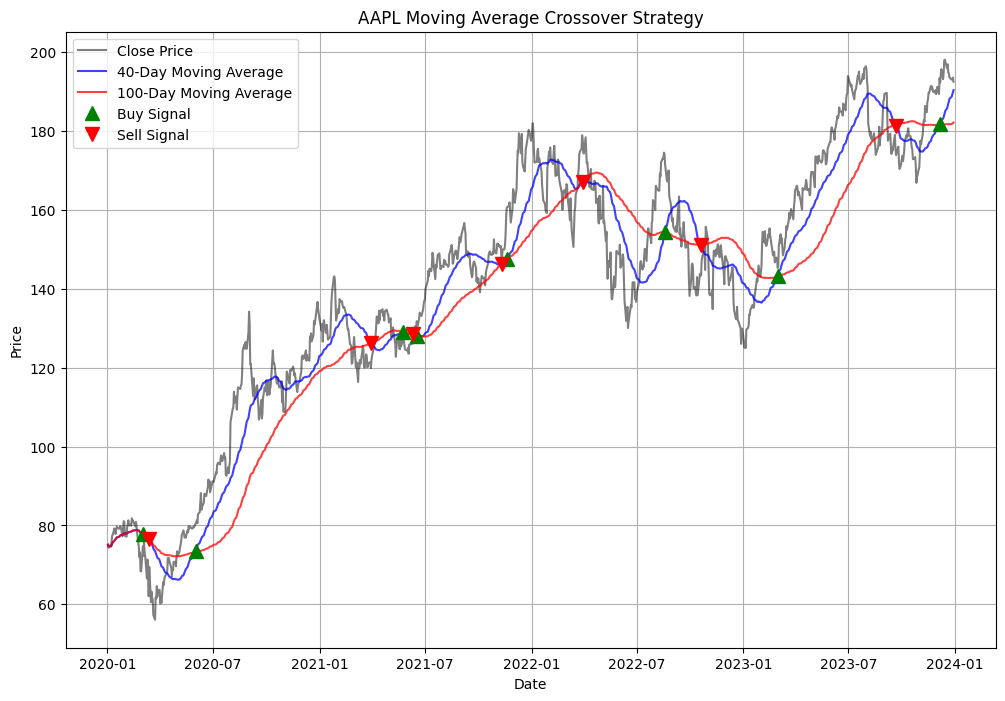

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the stock symbol and timeframe
symbol = 'AAPL'  # Example: Apple Inc.
start_date = '2020-01-01'
end_date = '2024-01-01'

# Fetch historical data
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate moving averages
short_window = 40  # Short-term moving average window
long_window = 100   # Long-term moving average window

data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate signals
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()

# Plot the data
plt.figure(figsize=(12, 8))

plt.plot(data['Close'], label='Close Price', color='black', alpha=0.5)
plt.plot(data['Short_MA'], label='40-Day Moving Average', color='blue', alpha=0.75)
plt.plot(data['Long_MA'], label='100-Day Moving Average', color='red', alpha=0.75)

# Plot buy signals
plt.plot(data[data['Position'] == 1].index, 
         data['Short_MA'][data['Position'] == 1], 
         '^', markersize=10, color='g', label='Buy Signal')

# Plot sell signals
plt.plot(data[data['Position'] == -1].index, 
         data['Short_MA'][data['Position'] == -1], 
         'v', markersize=10, color='r', label='Sell Signal')

plt.title(f'{symbol} Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\Jaypa\AppData\Local\Temp\ipykernel_27564\2575750729.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][short_window:] = np.where(data['Short_MA'][

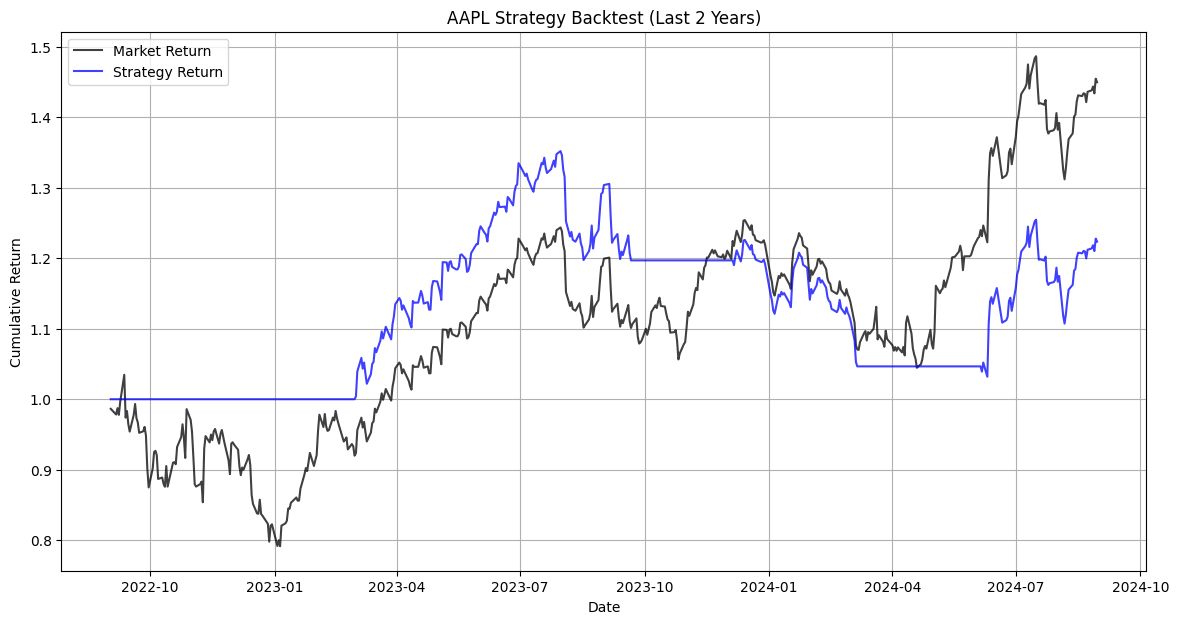

Final Cumulative Market Return: 1.4497340482823384
Final Cumulative Strategy Return: 1.2236018800976518
Strategy Return vs Market Return: -22.61%


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock symbol and timeframe
symbol = 'AAPL'
start_date = '2022-09-01'
end_date = '2024-09-01'

# Fetch historical data
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate moving averages
short_window = 40  # Short-term moving average window
long_window = 100   # Long-term moving average window

data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate signals
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()

# Calculate returns
data['Daily_Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Daily_Return'] * data['Signal'].shift(1)

# Calculate cumulative returns
data['Cumulative_Market_Return'] = (1 + data['Daily_Return']).cumprod()
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()

# Plot the results
plt.figure(figsize=(14, 7))

plt.plot(data['Cumulative_Market_Return'], label='Market Return', color='black', alpha=0.75)
plt.plot(data['Cumulative_Strategy_Return'], label='Strategy Return', color='blue', alpha=0.75)

plt.title(f'{symbol} Strategy Backtest (Last 2 Years)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Print final performance metrics
print("Final Cumulative Market Return:", data['Cumulative_Market_Return'].iloc[-1])
print("Final Cumulative Strategy Return:", data['Cumulative_Strategy_Return'].iloc[-1])
print("Strategy Return vs Market Return: {:.2%}".format(data['Cumulative_Strategy_Return'].iloc[-1] - data['Cumulative_Market_Return'].iloc[-1]))
